# Hierarchical Clustering

## Importing the libraries

In [1]:
# analysis
import numpy as np
import pandas as pd
import json

# other
import warnings
import os
import requests

# visualisation libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Notebook styling
%matplotlib inline
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
warnings.filterwarnings("ignore")

# model evaluation
from sklearn import metrics

In [2]:
def mode_from_modeslist(string):
    
    # remove the squre brackets
    string = string.replace("['", '')
    string = string.replace("']", '')
    
    # split the string
    return string.split("', '")[0].lower()

## Importing the dataset

In [3]:
# import predicted data
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'modedetection_rulebased_20210413_v001.csv')
df_predict = pd.read_csv(csv_path)

# set leg id as index
df_predict.set_index('leg_id', inplace=True)

print(df_predict.info())
df_predict.head()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_length          244 non-null    float64
 1   trip_length         244 non-null    float64
 2   leg_speed_min       244 non-null    float64
 3   leg_speed_max       244 non-null    float64
 4   leg_speed_ave       244 non-null    float64
 5   leg_speed_std       242 non-null    float64
 6   leg_speed_25        244 non-null    float64
 7   leg_speed_50        244 non-null    float64
 8   leg_speed_75        244 non-null    float64
 9   leg_speed_90        244 non-null    float64
 10  leg_accel_min       244 non-null    float64
 11  leg_accel_max       244 non-null    float64
 12  leg_accel_ave       244 non-null    float64
 13  leg_accel_std       242 non-null    float64
 14  leg_accel_25        244 non-null    float64

leg_length  trip_length  leg_speed_min  \
leg_id                                                                         
16a4e855-e304-4ccb-8e76-fe4ef2216923    19912.09     19912.09            0.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e    58643.01     58643.01            0.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2   193496.83    193496.83            0.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510    34050.32     34050.32            0.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f   245053.04    245053.04            0.0   

                                      leg_speed_max  leg_speed_ave  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923      21.475367       7.565223   
2a46c150-ff81-4eb2-8263-dbf574928e4e      35.417755      13.848899   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       9.872660       2.615374   
51f45eeb-4dd6-4c3b-9051-b53c60622510      17.970194       7.899383   
7d527d7b-5edc-4b0e-8e64-be45825c785f      10.366767       2.233045   

                                      leg_speed_std  leg_speed_25  \
leg_id                                                              
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.230792           0.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e      11.442848           0.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       2.205666           0.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510       5.955676           0.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f       2.012237           0.0   

                                      leg_speed_50  leg_speed_75  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923      6.761651     13.946930   
2a46c150-ff81-4eb2-8263-dbf574928e4e     14.540340     24.788048   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      2.954405      4.002220   
51f45eeb-4dd6-4c3b-9051-b53c60622510      8.365234     13.348819   
7d527d7b-5edc-4b0e-8e64-be45825c785f      2.393553      3.342469   

                                      leg_speed_90  ...  leg_accel_75  \
leg_id                                              ...                 
16a4e855-e304-4ccb-8e76-fe4ef2216923     17.527900  ...      1.152072   
2a46c150-ff81-4eb2-8263-dbf574928e4e     29.366355  ...      1.171396   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      4.996861  ...      0.263662   
51f45eeb-4dd6-4c3b-9051-b53c60622510     15.305262  ...      0.448630   
7d527d7b-5edc-4b0e-8e64-be45825c785f      4.400732  ...      0.341619   

                                      leg_accel_90  leg_duration  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923      6.870927         958.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e      8.474518        1195.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      1.653019        2280.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510      2.717465        1064.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f      1.457552        3922.0   

                                      trip_duration  modescore_walk  \
leg_id                                                                
16a4e855-e304-4ccb-8e76-fe4ef2216923           1025            75.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e           1300            75.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2           2460            75.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510           1100            75.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f           4225            75.0   

                                      modescore_car  modescore_bicycle  \
leg_id                                                                   
16a4e855-e304-4ccb-8e76-fe4ef2216923           75.0               50.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e           50.0               50.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2           50.0               50.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510           75.0               50.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f           50.0               50.0   

                   

In [4]:
# import validated data
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'validation_legmodes_20210414_v001.csv')
df_valid = pd.read_csv(csv_path)

# set leg id as index
df_valid.set_index('leg_id', inplace=True)

# create mode column
df_valid['leg_mode'] = df_valid['modes'].apply(mode_from_modeslist)


print(df_valid.info())
df_valid.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, e457f851-9079-472f-bd75-639c040a8be0 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   legstart_timestamp   34 non-null     object 
 1   legend_timestamp     34 non-null     object 
 2   trip_id              34 non-null     object 
 3   tripstart_timestamp  34 non-null     object 
 4   tripend_timestamp    34 non-null     object 
 5   trip_duration        34 non-null     int64  
 6   leg_duration         34 non-null     int64  
 7   participant_id       34 non-null     object 
 8   Timestamp            34 non-null     object 
 9   modes                34 non-null     object 
 10  trip_modecount       34 non-null     float64
 11  jirakanban_id        34 non-null     float64
 12  tripdiary_id         34 non-null     float64
 13  start_datetime       34 non-null     object 
 14  end_datetime         34 non-

legstart_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:26:10+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:14:35+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 21:01:50+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 04:31:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:42:45+00:00   

                                               legend_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:40:55+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:31:40+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-20 03:44:55+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 05:12:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:55:20+00:00   

                                                                   trip_id  \
leg_id                                                                       
e457f851-9079-472f-bd75-639c040a8be0  b42b1d56-e72a-40c9-b861-e26670ebaf58   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  69bd661c-7618-46fb-8444-daa87715cd0b   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  f7d8ea26-26d4-45b4-a75d-7f48a94e6513   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  1bcef9d7-f8c8-4f22-93c5-71135134efd7   

                                            tripstart_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:26:10+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:14:35+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 21:01:50+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 04:31:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:42:45+00:00   

                                              tripend_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:40:55+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:31:40+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-20 03:44:55+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 05:12:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:55:20+00:00   

                                      trip_duration  leg_duration  \
leg_id                                                              
e457f851-9079-472f-bd75-639c040a8be0            885         85515   
16a4e855-e304-4ccb-8e76-fe4ef2216923           1025         85375   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f          24185         62215   
4e909c85-c7b4-40b9-b2c9-7042f57793b2           2460         83940   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f            755         85645   

                                                            participant_id  \
leg_id                                                                       
e457f851-9079-472f-bd75-639c040a8be0  93181b36-6cfb-4b8d-a895-aabef5a6815c   
16a4e855-e304-4ccb-8e76-fe4ef2216923  93181b36-6cfb-4b8d-a895-aabef5a6815c   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  93181b36-6cfb-4b8d-a895-aabef5a6815c   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  93181b36-6cfb-4b8d-a895-aabef5a6815c   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  93181b36-6cfb-4b8d-a895-aabef5a6815c   

                                                      Timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 08:40:38+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 17:53:13+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 17:55:12+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 08:54:57+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 08:54:57+00:00   

                                                    modes  trip_modecount  \
leg_id                                  

In [5]:
dropvalid_cols = ['legstart_timestamp', 'legend_timestamp', 'modes', 'tripstart_timestamp',
                  'tripend_timestamp', 'tripend_timestamp', 'trip_duration', 'leg_duration',
                  'Timestamp', 'participant_id', 'jirakanban_id', 'tripdiary_id',
                  'trip_modecount', 'start_datetime', 'end_datetime']


In [6]:
# create dataframe to evaluate algorithm predictions
dataset = pd.merge(df_valid.drop(dropvalid_cols, axis=1),
                   df_predict, 'inner', left_index=True, right_index=True)

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 05171d36-ecd6-40b9-aa0d-bc393b34b451 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             41 non-null     object 
 1   leg_mode_x          41 non-null     object 
 2   leg_length          41 non-null     float64
 3   trip_length         41 non-null     float64
 4   leg_speed_min       41 non-null     float64
 5   leg_speed_max       41 non-null     float64
 6   leg_speed_ave       41 non-null     float64
 7   leg_speed_std       41 non-null     float64
 8   leg_speed_25        41 non-null     float64
 9   leg_speed_50        41 non-null     float64
 10  leg_speed_75        41 non-null     float64
 11  leg_speed_90        41 non-null     float64
 12  leg_accel_min       41 non-null     float64
 13  leg_accel_max       41 non-null     float64
 14  leg_accel_ave       41 non-null     float64


trip_id  \
leg_id                                                                       
05171d36-ecd6-40b9-aa0d-bc393b34b451  bc416c20-41cd-45bc-af21-4568cda0014d   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
1713fc73-46b0-4374-85dd-e833ce17e3ac  ff05430c-410c-4e61-adcb-e7b149e6bcaf   
2802fcaf-06b7-4022-a800-c3afdc489d67  59a1afe3-4493-43d9-8789-3db7bc47f01f   

                                     leg_mode_x  leg_length  trip_length  \
leg_id                                                                     
05171d36-ecd6-40b9-aa0d-bc393b34b451        bus    14863.03     14863.03   
16a4e855-e304-4ccb-8e76-fe4ef2216923        car    19912.09     19912.09   
16a4e855-e304-4ccb-8e76-fe4ef2216923        car    19912.09     19912.09   
1713fc73-46b0-4374-85dd-e833ce17e3ac       walk    34250.65     34250.65   
2802fcaf-06b7-4022-a800-c3afdc489d67        car     3249.27      3249.27   

                                      leg_speed_min  leg_speed_max  \
leg_id                                                               
05171d36-ecd6-40b9-aa0d-bc393b34b451            0.0      25.260000   
16a4e855-e304-4ccb-8e76-fe4ef2216923            0.0      21.475367   
16a4e855-e304-4ccb-8e76-fe4ef2216923            0.0      21.475367   
1713fc73-46b0-4374-85dd-e833ce17e3ac            0.0       2.960000   
2802fcaf-06b7-4022-a800-c3afdc489d67            0.0      19.188560   

                                      leg_speed_ave  leg_speed_std  \
leg_id                                                               
05171d36-ecd6-40b9-aa0d-bc393b34b451       6.411292       7.320046   
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.565223       7.230792   
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.565223       7.230792   
1713fc73-46b0-4374-85dd-e833ce17e3ac       0.938721       0.573642   
2802fcaf-06b7-4022-a800-c3afdc489d67       9.465106       7.885697   

                                      leg_speed_25  leg_speed_50  ...  \
leg_id                                                            ...   
05171d36-ecd6-40b9-aa0d-bc393b34b451        0.6250      1.850000  ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923        0.0000      6.761651  ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923        0.0000      6.761651  ...   
1713fc73-46b0-4374-85dd-e833ce17e3ac        0.5125      1.130000  ...   
2802fcaf-06b7-4022-a800-c3afdc489d67        0.0000     12.401509  ...   

                                      leg_accel_75  leg_accel_90  \
leg_id                                                             
05171d36-ecd6-40b9-aa0d-bc393b34b451      0.137000      0.566800   
16a4e855-e304-4ccb-8e76-fe4ef2216923      1.152072      6.870927   
16a4e855-e304-4ccb-8e76-fe4ef2216923      1.152072      6.870927   
1713fc73-46b0-4374-85dd-e833ce17e3ac      0.046955      0.153200   
2802fcaf-06b7-4022-a800-c3afdc489d67      2.184930      7.424122   

                                      leg_duration  trip_duration  \
leg_id                                                              
05171d36-ecd6-40b9-aa0d-bc393b34b451        2714.0           2795   
16a4e855-e304-4ccb-8e76-fe4ef2216923         958.0           1025   
16a4e855-e304-4ccb-8e76-fe4ef2216923         958.0           1025   
1713fc73-46b0-4374-85dd-e833ce17e3ac        4267.0           4365   
2802fcaf-06b7-4022-a800-c3afdc489d67         439.0            260   

                                      modescore_walk  modescore_car  \
leg_id                                                                
05171d36-ecd6-40b9-aa0d-bc393b34b451            75.0           50.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923            75.0           75.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923            75.0           75.0   
1713fc73-46b0-4374-85dd-e833ce17e3ac            50.0            0.0   
2802fcaf-06b7-4022-a800-c3afdc489d67            75.0           50.0   

                                  

In [7]:
x_cols = [col for col
          in dataset.columns
          if col not in ['trip_id', 'leg_mode_x', 'leg_mode_y']]


In [8]:
X = df_predict[x_cols].dropna()
# y = dataset[['leg_mode_x']]

print(f"features:\n{X.info()}")
# print(f"labels:\n{y.info()}")


<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_length          242 non-null    float64
 1   trip_length         242 non-null    float64
 2   leg_speed_min       242 non-null    float64
 3   leg_speed_max       242 non-null    float64
 4   leg_speed_ave       242 non-null    float64
 5   leg_speed_std       242 non-null    float64
 6   leg_speed_25        242 non-null    float64
 7   leg_speed_50        242 non-null    float64
 8   leg_speed_75        242 non-null    float64
 9   leg_speed_90        242 non-null    float64
 10  leg_accel_min       242 non-null    float64
 11  leg_accel_max       242 non-null    float64
 12  leg_accel_ave       242 non-null    float64
 13  leg_accel_std       242 non-null    float64
 14  leg_accel_25        242 non-null    float64

## Using the dendrogram to find the optimal number of clusters

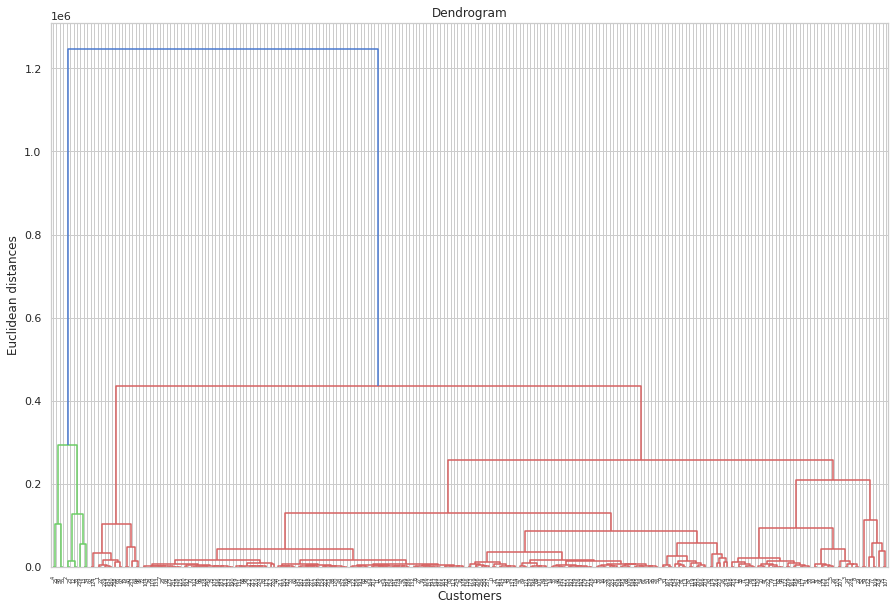

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Model Prediction

In [13]:
dataset['cluster'] = hc.fit_predict(dataset[x_cols])

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 05171d36-ecd6-40b9-aa0d-bc393b34b451 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             41 non-null     object 
 1   leg_mode_x          41 non-null     object 
 2   leg_length          41 non-null     float64
 3   trip_length         41 non-null     float64
 4   leg_speed_min       41 non-null     float64
 5   leg_speed_max       41 non-null     float64
 6   leg_speed_ave       41 non-null     float64
 7   leg_speed_std       41 non-null     float64
 8   leg_speed_25        41 non-null     float64
 9   leg_speed_50        41 non-null     float64
 10  leg_speed_75        41 non-null     float64
 11  leg_speed_90        41 non-null     float64
 12  leg_accel_min       41 non-null     float64
 13  leg_accel_max       41 non-null     float64
 14  leg_accel_ave       41 non-null     float64


trip_id  \
leg_id                                                                       
05171d36-ecd6-40b9-aa0d-bc393b34b451  bc416c20-41cd-45bc-af21-4568cda0014d   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
1713fc73-46b0-4374-85dd-e833ce17e3ac  ff05430c-410c-4e61-adcb-e7b149e6bcaf   
2802fcaf-06b7-4022-a800-c3afdc489d67  59a1afe3-4493-43d9-8789-3db7bc47f01f   

                                     leg_mode_x  leg_length  trip_length  \
leg_id                                                                     
05171d36-ecd6-40b9-aa0d-bc393b34b451        bus    14863.03     14863.03   
16a4e855-e304-4ccb-8e76-fe4ef2216923        car    19912.09     19912.09   
16a4e855-e304-4ccb-8e76-fe4ef2216923        car    19912.09     19912.09   
1713fc73-46b0-4374-85dd-e833ce17e3ac       walk    34250.65     34250.65   
2802fcaf-06b7-4022-a800-c3afdc489d67        car     3249.27      3249.27   

                                      leg_speed_min  leg_speed_max  \
leg_id                                                               
05171d36-ecd6-40b9-aa0d-bc393b34b451            0.0      25.260000   
16a4e855-e304-4ccb-8e76-fe4ef2216923            0.0      21.475367   
16a4e855-e304-4ccb-8e76-fe4ef2216923            0.0      21.475367   
1713fc73-46b0-4374-85dd-e833ce17e3ac            0.0       2.960000   
2802fcaf-06b7-4022-a800-c3afdc489d67            0.0      19.188560   

                                      leg_speed_ave  leg_speed_std  \
leg_id                                                               
05171d36-ecd6-40b9-aa0d-bc393b34b451       6.411292       7.320046   
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.565223       7.230792   
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.565223       7.230792   
1713fc73-46b0-4374-85dd-e833ce17e3ac       0.938721       0.573642   
2802fcaf-06b7-4022-a800-c3afdc489d67       9.465106       7.885697   

                                      leg_speed_25  leg_speed_50  ...  \
leg_id                                                            ...   
05171d36-ecd6-40b9-aa0d-bc393b34b451        0.6250      1.850000  ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923        0.0000      6.761651  ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923        0.0000      6.761651  ...   
1713fc73-46b0-4374-85dd-e833ce17e3ac        0.5125      1.130000  ...   
2802fcaf-06b7-4022-a800-c3afdc489d67        0.0000     12.401509  ...   

                                      leg_accel_90  leg_duration  \
leg_id                                                             
05171d36-ecd6-40b9-aa0d-bc393b34b451      0.566800        2714.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923      6.870927         958.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923      6.870927         958.0   
1713fc73-46b0-4374-85dd-e833ce17e3ac      0.153200        4267.0   
2802fcaf-06b7-4022-a800-c3afdc489d67      7.424122         439.0   

                                      trip_duration  modescore_walk  \
leg_id                                                                
05171d36-ecd6-40b9-aa0d-bc393b34b451           2795            75.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923           1025            75.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923           1025            75.0   
1713fc73-46b0-4374-85dd-e833ce17e3ac           4365            50.0   
2802fcaf-06b7-4022-a800-c3afdc489d67            260            75.0   

                                      modescore_car  modescore_bicycle  \
leg_id                                                                   
05171d36-ecd6-40b9-aa0d-bc393b34b451           50.0               50.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923           75.0               50.0   
16a4e855-e304-4ccb-8e76-fe4ef2216923           75.0               50.0   
1713fc73-46b0-4374-85dd-e833ce17e3ac            0.0                0.0   
2802fcaf-06b7-4022-a800-c3afdc489d67           50.0               50.0   


In [14]:
dataset['cluster'].unique()

array([0, 1, 4, 2, 3])

In [15]:
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'modedetection_hierclusterValidation_20210421_v001.csv')
dataset.to_csv(csv_path)

In [16]:
array_y = hc.fit_predict(df_predict[x_cols].dropna())
df_y = df_predict.dropna()

df_y['leg_mode'] = array_y
df_y = df_y[['leg_mode']]


print(df_y.info())
df_y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   leg_mode  242 non-null    int64
dtypes: int64(1)
memory usage: 3.8+ KB
None


leg_mode
leg_id                                        
16a4e855-e304-4ccb-8e76-fe4ef2216923         1
2a46c150-ff81-4eb2-8263-dbf574928e4e         2
4e909c85-c7b4-40b9-b2c9-7042f57793b2         4
51f45eeb-4dd6-4c3b-9051-b53c60622510         0
7d527d7b-5edc-4b0e-8e64-be45825c785f         3

In [17]:
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'modedetection_hiercluster_20210422_v001.csv')
df_y.to_csv(csv_path)